# CCPP: 

### Práctica bootcamp The Bridge.tech, 
### Profesor: Yago García Marqués

Utilizaremos los datos del CSV Aceite de Oliva el objetivo es discernir cuantos tipos de aceite hay, suponemos que la base de datos ha sido tratada ya, si no utilizar notebook de limpieza en data.

In [72]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import pylab as pl

# Preprocesado y modelado
# ==============================================================================
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Configuración y warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import squarify

### Cargamos la data:

In [8]:
df = pd.read_csv('Aceite_de_oliva.csv', sep=",",header=0)
df=pd.DataFrame(df)
df=df[df.columns[1:]]
df=df.set_index('ID')
df

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
ID,,,,,,,,
1,1075,75,226,7823,672,36,60,29
2,1088,73,224,7709,781,31,61,29
3,911,54,246,8113,549,31,63,29
4,966,57,240,7952,619,50,78,35
5,1051,67,259,7771,672,50,80,46
...,...,...,...,...,...,...,...,...
568,1280,110,290,7490,790,10,10,2
569,1060,100,270,7740,810,10,10,3
570,1010,90,210,7720,970,0,0,2


Cuando nuestra base de datos es pequeña, un vistazo general siempre es de ayuda.

In [9]:
df.describe()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,1231.741259,126.094406,228.865385,7311.748252,980.527972,31.888112,58.097902,16.281469
std,168.592264,52.494365,36.744935,405.810222,242.799221,12.968697,22.030250,14.083295
min,610.000000,15.000000,152.000000,6300.000000,448.000000,0.000000,0.000000,1.000000
25%,1095.000000,87.750000,205.000000,7000.000000,770.750000,26.000000,50.000000,2.000000
50%,1201.000000,110.000000,223.000000,7302.500000,1030.000000,33.000000,61.000000,17.000000
75%,1360.000000,169.250000,249.000000,7680.000000,1180.750000,40.250000,70.000000,28.000000
max,1753.000000,280.000000,375.000000,8410.000000,1470.000000,74.000000,105.000000,58.000000


Como tratar la data para el uso de componentes principales. TRANSFORMEMOSLA. 

In [10]:
df2=df.apply(lambda x: np.log(x+1))
df2

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
ID,,,,,,,,
1,6.981006,4.330733,5.424950,8.964951,6.511745,3.610918,4.110874,3.401197
2,6.993015,4.304065,5.416100,8.950273,6.661855,3.465736,4.127134,3.401197
3,6.815640,4.007333,5.509388,9.001346,6.309918,3.465736,4.158883,3.401197
4,6.874198,4.060443,5.484797,8.981304,6.429719,3.931826,4.369448,3.583519
5,6.958448,4.219508,5.560682,8.958283,6.511745,3.931826,4.394449,3.850148
...,...,...,...,...,...,...,...,...
568,7.155396,4.709530,5.673323,8.921458,6.673298,2.397895,2.397895,1.098612
569,6.966967,4.615121,5.602119,8.954286,6.698268,2.397895,2.397895,1.386294
570,6.918695,4.510860,5.351858,8.951699,6.878326,0.000000,0.000000,1.098612


Volvamos a echar un vistazo a la data.

In [11]:
df2.describe()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,7.107708,4.752890,5.425494,8.895837,6.855507,3.301672,3.870479,2.321076
std,0.136553,0.445578,0.153238,0.055521,0.266213,0.859640,0.946396,1.150338
min,6.415097,2.772589,5.030438,8.748464,6.107023,0.000000,0.000000,0.693147
25%,6.999422,4.485811,5.327876,8.853808,6.648661,3.295837,3.931826,1.098612
50%,7.091742,4.709530,5.411646,8.896109,6.938284,3.526361,4.127134,2.890372
75%,7.215975,5.137265,5.521461,8.946505,7.074751,3.719596,4.262680,3.367296
max,7.469654,5.638355,5.929589,9.037296,7.293698,4.317488,4.663439,4.077537


## Mi parte favorita, FUNAR VARIABLES

Vamos a eliminar las variables que dependan entre ellas linealmente.

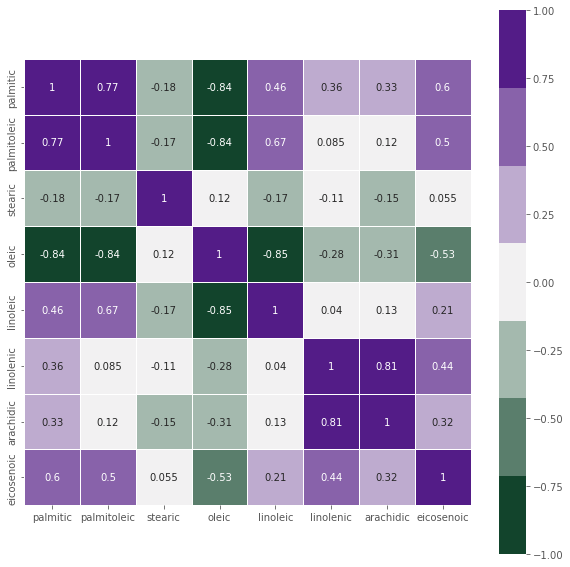

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),
           vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot = True,
           square = True,
           linewidths = .5);

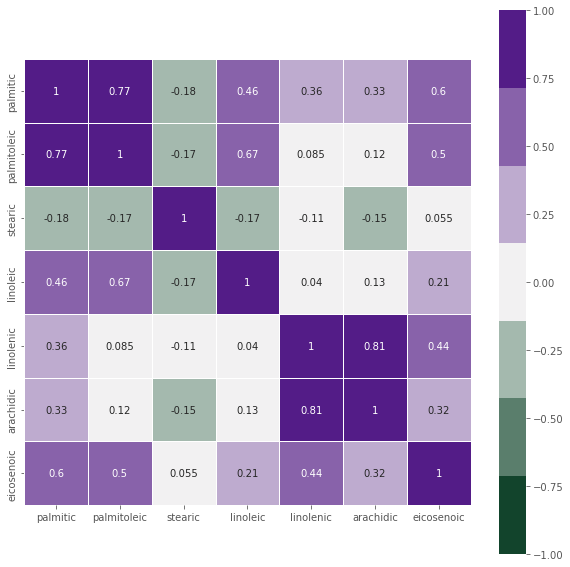

In [13]:
df3=df2[['palmitic','palmitoleic','stearic','linoleic','linolenic','arachidic','eicosenoic']]
plt.figure(figsize=(10,10))
sns.heatmap(df3.corr(),
           vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot = True,
           square = True,
           linewidths = .5);

## PCA ANALISIS AL FIN

Vamos a proyectar nuestra data al espacio de las componenetes principales y a sacar las componentes principales:

In [15]:
pca_pipe = make_pipeline(PCA())
pca_pipe.fit(df3[df3.columns.values[:7]])
modelo_pca = pca_pipe.named_steps['pca']
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df3.columns[:8],index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7']
)

,palmitic,palmitoleic,stearic,linoleic,linolenic,arachidic,eicosenoic
PC1,-0.057398,-0.122594,0.007195,-0.038842,-0.512102,-0.525969,-0.664246
PC2,0.041927,0.207051,0.024798,0.047439,-0.383481,-0.564132,0.698000
PC3,-0.129411,-0.699251,0.083914,-0.416297,0.390981,-0.369524,0.156660
PC4,-0.107457,-0.427452,0.074442,-0.236677,-0.660101,0.517296,0.202118
PC5,-0.150789,-0.443783,0.120755,0.872523,0.009366,-0.027657,0.059901
PC6,-0.014423,0.153838,0.984607,-0.057120,0.030570,0.013975,-0.047775
PC7,-0.971446,0.223213,-0.052130,-0.048606,0.032732,0.002820,0.017557


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.61055    0.88192763 0.94540357 0.98278769 0.99201538 0.9984011
 1.        ]


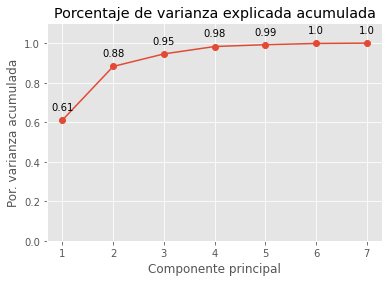

In [18]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df3.columns[:7])) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df3.columns[:7])) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [20]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(df3)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7'],
    index   = df3.index
)
proyecciones;

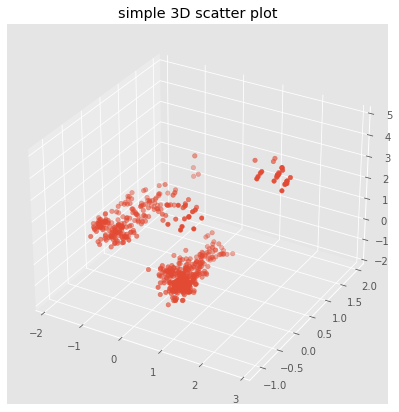

In [21]:
x = proyecciones[proyecciones.columns.values[0]]
y = proyecciones[proyecciones.columns.values[1]]
z = proyecciones[proyecciones.columns.values[2]]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(y,z, x )
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

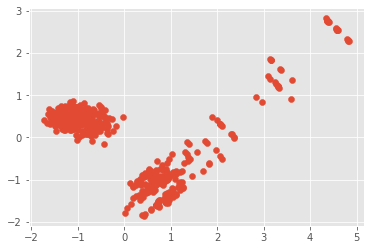

In [22]:
pl.scatter(x,y)

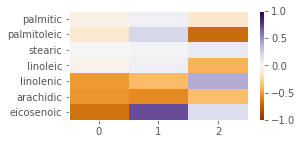

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes[0:3].T, cmap='PuOr', aspect='auto',vmin = -1,vmax = 1)
plt.yticks(range(len(df3.columns[0:7])), df3.columns[0:7])
plt.xticks(range(3))
plt.grid(False)
plt.colorbar();

In [24]:
df5=df2[['palmitic','palmitoleic','linoleic','arachidic','eicosenoic','linolenic']]

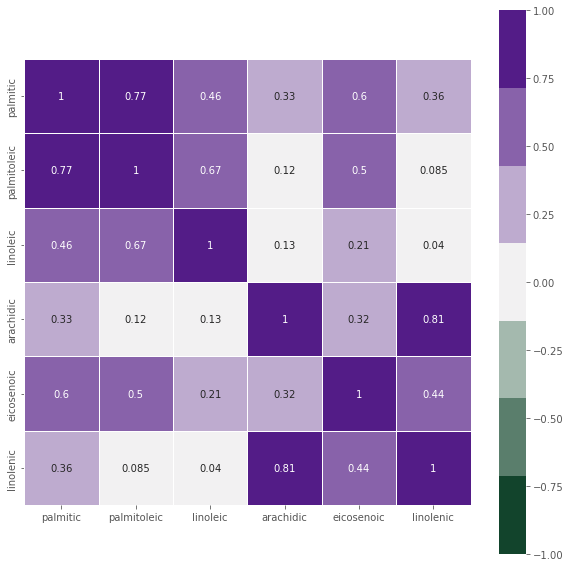

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df5.corr(),
           vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot = True,
           square = True,
           linewidths = .5);

In [27]:
pca_pipe = make_pipeline(PCA())
pca_pipe.fit(df5[df5.columns.values[:]])
modelo_pca = pca_pipe.named_steps['pca']
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df3.columns[:6],index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6']
)

,palmitic,palmitoleic,stearic,linoleic,linolenic,arachidic
PC1,-0.057391,-0.122568,-0.038820,-0.525896,-0.664377,-0.512068
PC2,0.042049,0.207588,0.047710,-0.564386,0.697862,-0.383824
PC3,-0.128568,-0.697834,-0.416309,-0.376515,0.157046,0.395927
PC4,-0.108831,-0.437636,-0.243793,0.512144,0.205881,-0.657661
PC5,-0.150388,-0.459435,0.872432,-0.028891,0.065601,0.005244
PC6,-0.971570,0.228706,-0.048286,0.003567,0.015450,0.034099


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.61493534 0.88811245 0.95164525 0.98912417 0.9983762  1.        ]


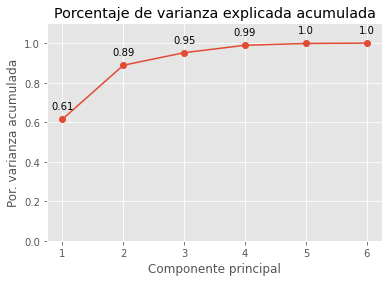

In [28]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df5.columns[:6])) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df5.columns[:7])) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [29]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(df5)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6'],
    index   = df5.index
)
proyecciones

,PC1,PC2,PC3,PC4,PC5,PC6
ID,,,,,,
1,-0.930026,0.390041,0.655552,0.424460,-0.021367,0.071239
2,-0.867482,0.438719,0.546522,0.502037,0.118808,0.041331
3,-0.823967,0.334953,0.910957,0.753261,-0.026145,0.162905
4,-1.309022,0.183655,0.950382,0.533286,0.053487,0.131835
5,-1.526828,0.396090,0.826861,0.502205,0.056068,0.086607
...,...,...,...,...,...,...
568,2.059049,0.309197,0.104618,-0.353271,-0.188605,-0.102409
569,1.889336,0.483629,0.229511,-0.238306,-0.076235,0.062310
570,4.577953,2.541491,0.141786,0.058385,0.173846,-0.018094


In [30]:
x = proyecciones[proyecciones.columns.values[0]]
y = proyecciones[proyecciones.columns.values[1]]

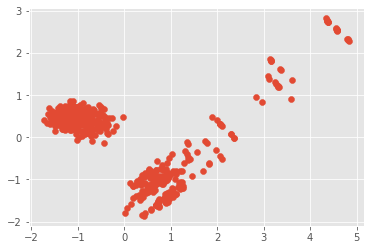

In [31]:
pl.scatter(x,y)

In [32]:
df6=pd.DataFrame([x,y]).T
df6=df6.astype(float)
df7=df6.astype(float)

## KMEANS

In [33]:
modelo_kmeans = KMeans(n_clusters=3, n_init=25, random_state=123)
modelo_kmeans.fit(X=df6[df6.columns[0:2]])

KMeans(n_clusters=3, n_init=25, random_state=123)

In [34]:
y_predict = modelo_kmeans.predict(X=df6[df6.columns[0:2]])
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [35]:
df6['grupo']=y_predict.astype(str)
colors={'0':'RoyalBlue','1':'DarkSeaGreen','2':'magenta'}
potcolor=df6.grupo.map(colors)
potcolor

ID
1      DarkSeaGreen
2      DarkSeaGreen
3      DarkSeaGreen
4      DarkSeaGreen
5      DarkSeaGreen
           ...     
568       RoyalBlue
569       RoyalBlue
570         magenta
571       RoyalBlue
572       RoyalBlue
Name: grupo, Length: 572, dtype: object

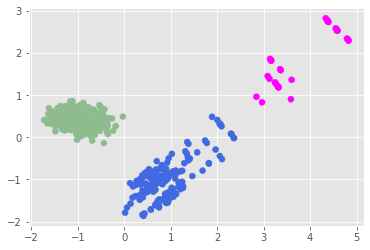

In [36]:
pl.scatter(df6['PC1'],df6['PC2'],color=potcolor)

In [37]:
modelo_kmeans = KMeans(n_clusters=4, n_init=25, random_state=123)
modelo_kmeans.fit(X=df7[df7.columns[0:2]])

KMeans(n_clusters=4, n_init=25, random_state=123)

In [38]:
y_predict = modelo_kmeans.predict(X=df7[df7.columns[0:2]])
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
df7['grupo']=y_predict.astype(str)
colors={'0':'RoyalBlue','1':'DarkSeaGreen','2':'magenta','3':'yellow'}
potcolor=df7.grupo.map(colors)
potcolor

ID
1      RoyalBlue
2      RoyalBlue
3      RoyalBlue
4      RoyalBlue
5      RoyalBlue
         ...    
568       yellow
569       yellow
570      magenta
571       yellow
572       yellow
Name: grupo, Length: 572, dtype: object

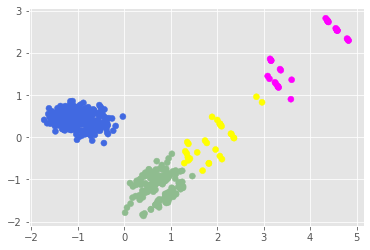

In [40]:
pl.scatter(df7['PC1'],df7['PC2'],color=potcolor)

In [41]:
Modelo1=df2[['palmitic','palmitoleic','linoleic','linolenic','arachidic','eicosenoic']]
Modelo2=df2[['palmitic','palmitoleic','linoleic','linolenic','arachidic','eicosenoic']]
Modelo1['grupos']=df6['grupo']
Modelo2['grupos']=df7['grupo']
Modelo2

,palmitic,palmitoleic,linoleic,linolenic,arachidic,eicosenoic,grupos
ID,,,,,,,
1,6.981006,4.330733,6.511745,3.610918,4.110874,3.401197,0
2,6.993015,4.304065,6.661855,3.465736,4.127134,3.401197,0
3,6.815640,4.007333,6.309918,3.465736,4.158883,3.401197,0
4,6.874198,4.060443,6.429719,3.931826,4.369448,3.583519,0
5,6.958448,4.219508,6.511745,3.931826,4.394449,3.850148,0
...,...,...,...,...,...,...,...
568,7.155396,4.709530,6.673298,2.397895,2.397895,1.098612,3
569,6.966967,4.615121,6.698268,2.397895,2.397895,1.386294,3
570,6.918695,4.510860,6.878326,0.000000,0.000000,1.098612,2


## Más métodos para saber si estamos haciendo una clasificación correcta

In [44]:
Modelo1
X= Modelo1.drop('grupos',axis=1)
y= Modelo1['grupos']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 10, test_size=0.2)

In [78]:
max_depth_range = list(range(1, 10))# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train
            ,y_train)    
    score = clf.score(X_test
                  ,y_test)
    accuracy.append(score)
accuracy

[0.9304347826086956,
 0.9478260869565217,
 1.0,
 1.0,
 0.991304347826087,
 0.991304347826087,
 0.991304347826087,
 0.991304347826087,
 0.991304347826087]

Profundidad del árbol: 3
Número de nodos terminales: 4


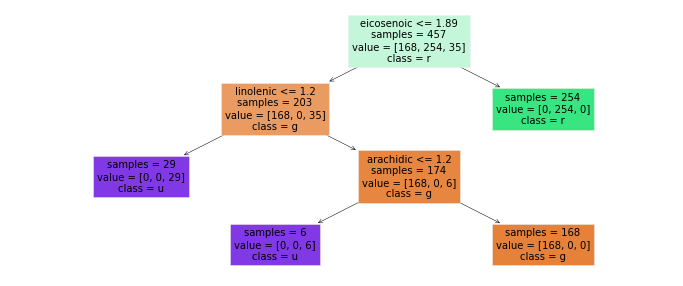

In [46]:
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)
# Estructura del árbol creado
# ------------------------------------------------------------------------------
clf.fit(X_train
            ,y_train)    

fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names =X_train.columns,
            class_names   = 'grupos',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [79]:
Modelo2
X= Modelo2.drop('grupos',axis=1)
y= Modelo2['grupos']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 10, test_size=0.2)

In [82]:
max_depth_range = list(range(1, 10))# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train
            ,y_train)    
    score = clf.score(X_test
                  ,y_test)
    accuracy.append(score)
accuracy

[0.9304347826086956,
 0.9478260869565217,
 1.0,
 1.0,
 0.991304347826087,
 0.991304347826087,
 0.991304347826087,
 0.991304347826087,
 0.991304347826087]

Profundidad del árbol: 3
Número de nodos terminales: 5


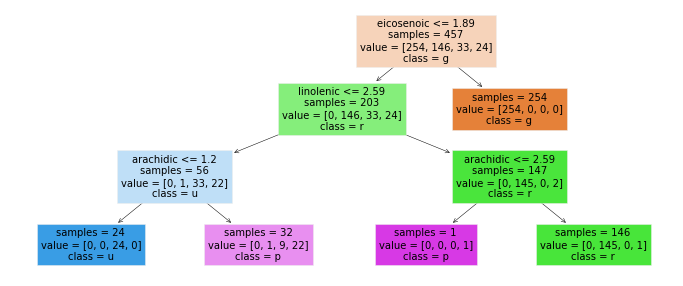

In [83]:
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)
clf.fit(X_train
            ,y_train)    

fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names =X_train.columns,
            class_names   = 'grupos',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [84]:
modelo10=Modelo1[Modelo1[Modelo1['grupos']==0]]
Modelo1[Modelo1[Modelo1['grupos']==0]]
Modelo1['grupos']=='0';

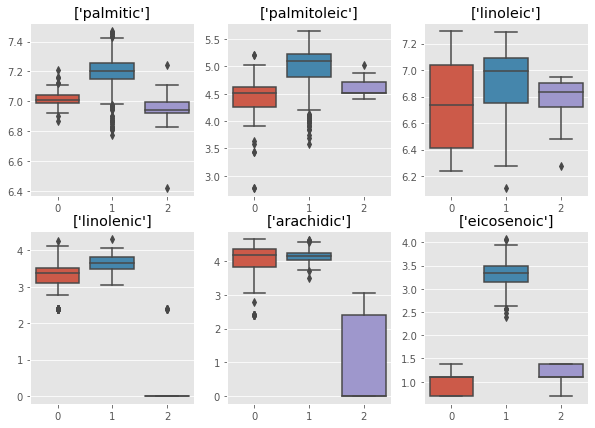

In [85]:
#Nos hace falta la comparacion directa con ca:9a variable.
modelo20=Modelo1[Modelo1['grupos']=='0']
modelo21=Modelo1[Modelo1['grupos']=='1']
modelo22=Modelo1[Modelo1['grupos']=='2']
fig = plt.figure(figsize=(10,7))
for i in range(6):
    ax=plt.subplot(2,3,i+1) 
    sns.boxplot(data = [modelo20[modelo20.columns.values[i:i+1]],
                        modelo21[modelo21.columns.values[i:i+1]],
                        modelo22[modelo22.columns.values[i:i+1]]]).set_title(Modelo2.columns.values[i:i+1])
plt.show()

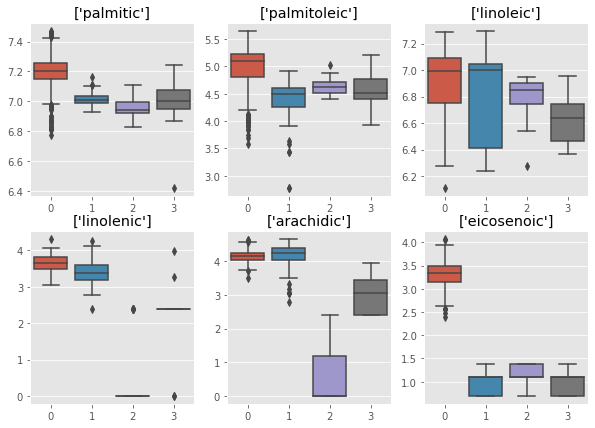

In [86]:
#Nos hace falta la comparacion directa con ca:9a variable.
modelo20=Modelo2[Modelo2['grupos']=='0']
modelo21=Modelo2[Modelo2['grupos']=='1']
modelo22=Modelo2[Modelo2['grupos']=='2']
modelo23=Modelo2[Modelo2['grupos']=='3']
fig = plt.figure(figsize=(10,7))
for i in range(6):
    ax=plt.subplot(2,3,i+1) 
    sns.boxplot(data = [modelo20[modelo20.columns.values[i:i+1]],
                        modelo21[modelo21.columns.values[i:i+1]],
                        modelo22[modelo22.columns.values[i:i+1]],
                        modelo23[modelo23.columns.values[i:i+1]]]).set_title(Modelo2.columns.values[i:i+1])
plt.show()

In [53]:
dffinal=df[['palmitic','palmitoleic','linoleic','linolenic','arachidic','eicosenoic']]
dffinal['grupos1']=Modelo1['grupos']
dffinal['grupos2']=Modelo2['grupos']
final1=dffinal.groupby('grupos1').mean()
final2=dffinal.groupby('grupos2').mean()
final1
df22=dffinal[(dffinal['grupos2']=='1') | (dffinal['grupos2']=='3')]

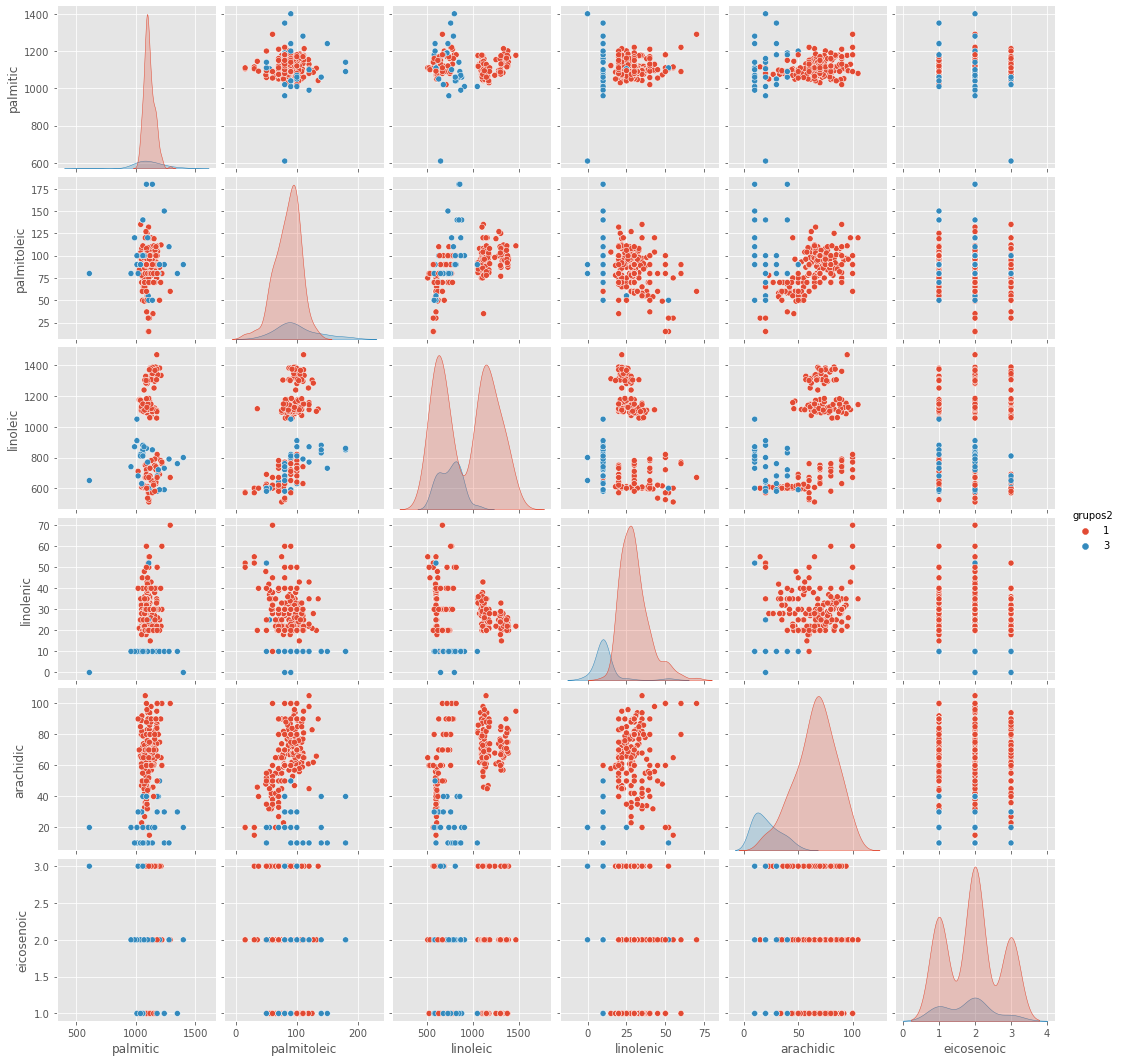

In [54]:
sns.pairplot(df22,hue='grupos2')

In [55]:
final1

,palmitic,palmitoleic,linoleic,linolenic,arachidic,eicosenoic
grupos1,,,,,,
0,1111.165094,86.816038,913.405660,27.712264,59.976415,1.915094
1,1332.287926,154.801858,1033.498452,38.065015,63.117647,27.321981
2,1044.864865,100.540541,902.702703,1.891892,3.513514,2.216216


In [56]:
final2

,palmitic,palmitoleic,linoleic,linolenic,arachidic,eicosenoic
grupos2,,,,,,
0,1332.287926,154.801858,1033.498452,38.065015,63.117647,27.321981
1,1111.043478,84.619565,937.782609,30.097826,65.842391,1.940217
2,1047.142857,101.428571,912.857143,2.000000,2.571429,2.200000
3,1104.833333,100.166667,751.333333,11.233333,21.333333,1.800000


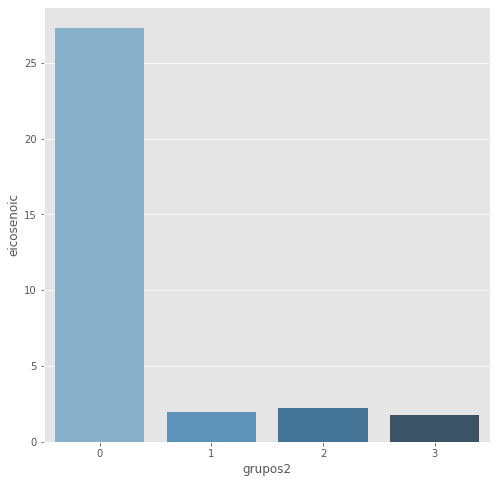

In [57]:
plt.figure(figsize=(8,8))
sns.barplot(x = final2.index,
           y = 'eicosenoic',
           palette = 'Blues_d',
           data =final2,
           ci = None);

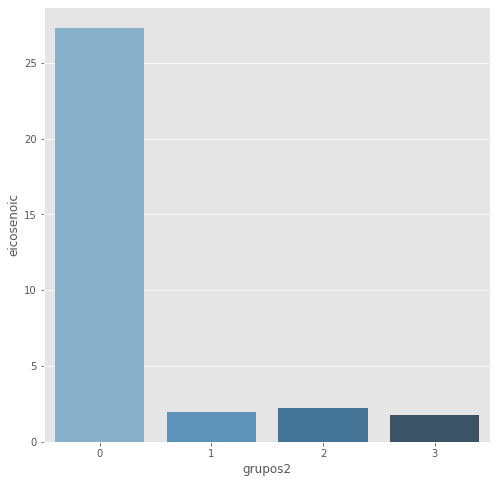

In [87]:
plt.figure(figsize=(8,8))
sns.barplot(x = final2.index,
           y = 'eicosenoic',
           palette = 'Blues_d',
           data =final2,
           ci = None);

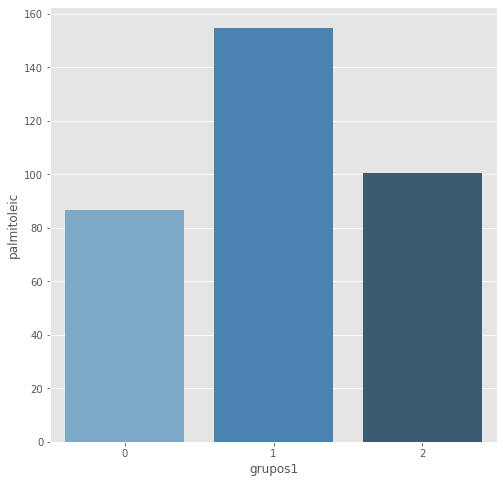

In [59]:
plt.figure(figsize=(8,8))
sns.barplot(x = final1.index,
           y = 'palmitoleic',
           palette = 'Blues_d',
           data =final1,
           ci = None);

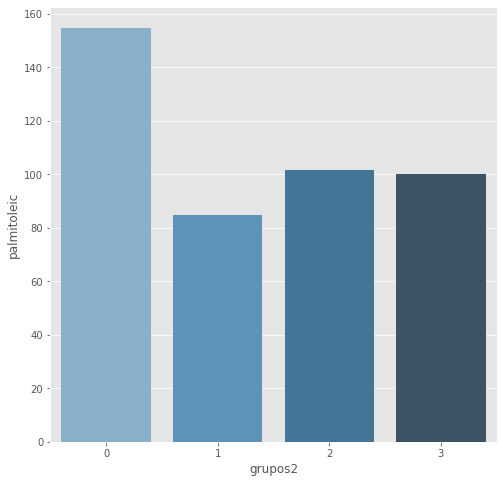

In [60]:
plt.figure(figsize=(8,8))
sns.barplot(x = final2.index,
           y = 'palmitoleic',
           palette = 'Blues_d',
           data =final2,
           ci = None);

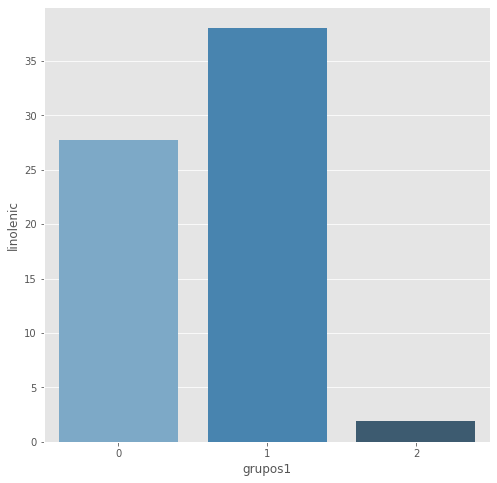

In [61]:
plt.figure(figsize=(8,8))
sns.barplot(x = final1.index,
           y = 'linolenic',
           palette = 'Blues_d',
           data =final1,
           ci = None);

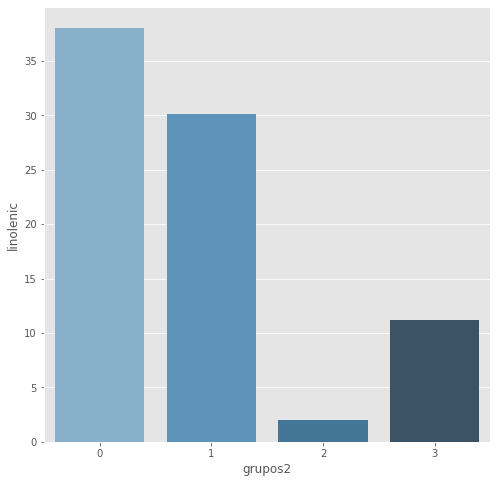

In [62]:
plt.figure(figsize=(8,8))
sns.barplot(x = final2.index,
           y = 'linolenic',
           palette = 'Blues_d',
           data =final2,
           ci = None);

In [63]:
df10=dffinal.groupby("grupos2").mean()
df10

,palmitic,palmitoleic,linoleic,linolenic,arachidic,eicosenoic
grupos2,,,,,,
0,1332.287926,154.801858,1033.498452,38.065015,63.117647,27.321981
1,1111.043478,84.619565,937.782609,30.097826,65.842391,1.940217
2,1047.142857,101.428571,912.857143,2.000000,2.571429,2.200000
3,1104.833333,100.166667,751.333333,11.233333,21.333333,1.800000


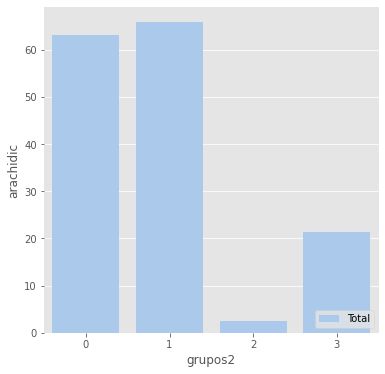

In [64]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

sns.set_color_codes("pastel")
sns.barplot(x=df10.index, y="arachidic", data=df10,
            label="Total", color="b")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

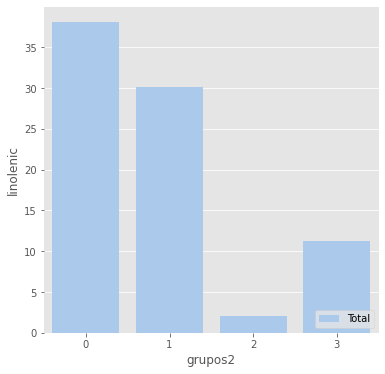

In [65]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

sns.set_color_codes("pastel")
sns.barplot(x=df10.index, y="linolenic", data=df10,
            label="Total", color="b")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

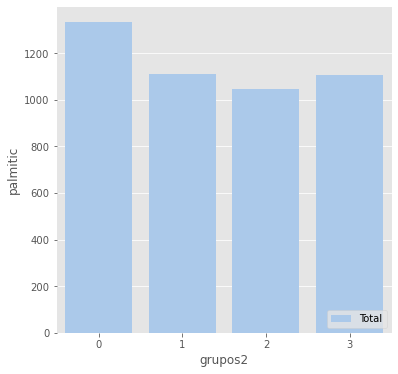

In [66]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

sns.set_color_codes("pastel")
sns.barplot(x=df10.index, y="palmitic", data=df10,
            label="Total", color="b")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

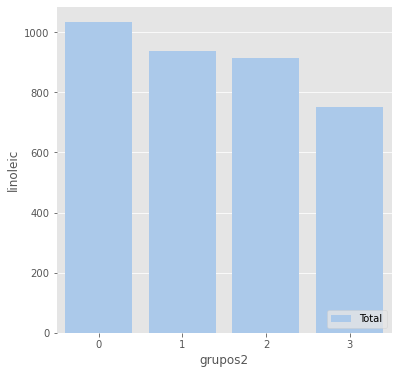

In [67]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

sns.set_color_codes("pastel")
sns.barplot(x=df10.index, y="linoleic", data=df10,
            label="Total", color="b")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

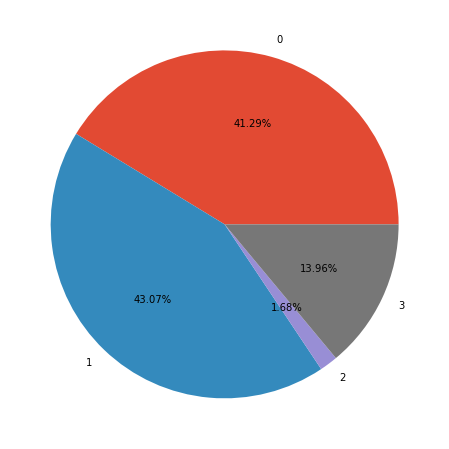

In [68]:
# pie chart
plt.figure(figsize=(8,8))
plt.pie(df10['arachidic'],
        labels=df10.index,
        autopct='%1.2f%%');

In [73]:
dffinal=pd.DataFrame(dffinal)
dffinal.to_csv('nombre.csv')

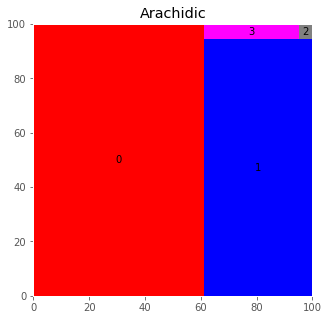

In [74]:
import squarify

data = dffinal.groupby("grupos2").sum()['arachidic'].sort_values(ascending=False)[:15]

plt.figure(figsize=(5,5))
squarify.plot(sizes = data.values, label = data.index,color=['red','blue','magenta','grey']).set_title('Arachidic');

In [75]:
dffinal;

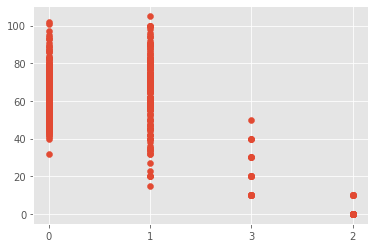

In [76]:
pl.scatter(dffinal['grupos2'],dffinal['arachidic'])

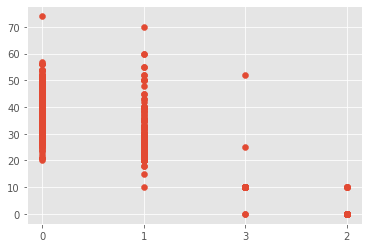

In [77]:
pl.scatter(dffinal['grupos2'],dffinal['linolenic'])